# PLEASE RUN ON COLAB TO AVOID DEPENDENCY ISSUES

In [1]:
# !pip install bertopic octis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
from bertopic import BERTopic
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel

from bertopic.vectorizers import ClassTfidfTransformer
from umap import UMAP

# import torch

from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.evaluation_metrics.coherence_metrics import Coherence

In [3]:
def get_topic_diversity(topic_model, topk=10):
    td = TopicDiversity(topk=topk)
    topic_list = list(topic_model.get_topics().values())
    td_score = td.score({'topics': topic_list})
    return td_score

In [4]:
df = pd.read_csv('tweets-2023-sentiment.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
df = df.dropna().reset_index(drop=True)
df

created_at  \
0    2023-01-01 04:30:30+00:00   
1    2023-01-01 04:47:16+00:00   
2    2023-01-01 06:42:04+00:00   
3    2023-01-01 06:42:05+00:00   
4    2023-01-01 09:48:10+00:00   
...                        ...   
9806 2023-12-30 22:27:09+00:00   
9807 2023-12-30 22:59:50+00:00   
9808 2023-12-30 23:00:32+00:00   
9809 2023-12-30 23:35:08+00:00   
9810 2023-12-30 23:59:55+00:00   

                                              full_text  \
0     Condom crisis: Busia sex workers recycle condo...   
1     Cause we know crying doesn t solve the problem...   
2     Obviously it s bad for your health but it s al...   
3     Vapes can take hundreds of years to degrade. T...   
4     Aluminium crushing: If the manufacturer finds ...   
...                                                 ...   
9806  Pilots are being paid per pound of industrial ...   
9807                    toxic waste ain't that sour tbh   
9808  This eye-opening ArcGIS StoryMap provides an o...   
9809  There is no situation where not giving up is t...   
9810  @gimbakakanda education is a waste if this is ...   

                                           cleaned_text sentiment  
0     condom crisis busia sex workers recycle condom...   Neutral  
1     cause know crying solve problem gotta stay sol...  Negative  
2     obviously bad health also terrible environment...  Negative  
3     vapes take hundreds years degrade break microp...  Negative  
4     aluminium crushing manufacturer finds issue pr...  Negative  
...                                                 ...       ...  
9806  pilots paid per pound industrial waste spread ...  Negative  
9807                          toxic waste aint sour tbh  Negative  
9808  eyeopening arcgis storymap provides overview c...   Neutral  
9809  situation giving toxic like queue play play le...  Negative  
9810                             education waste reason  Negative  

[9811 rows x 4 columns]

In [5]:
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)

In [6]:
results_per_sentiment = {}
sentiment_classes = df['sentiment'].unique()

In [7]:
for sentiment in sentiment_classes:
    print(f"\n=== Analisis BERTopic untuk Sentimen: {sentiment} ===")

    filtered_df = df[df['sentiment'] == sentiment]
    text_data = filtered_df['cleaned_text'].tolist()

    topic_model = BERTopic(verbose=True,
                        #    calculate_probabilities=True,
                           nr_topics="auto", 
                        #    ctfidf_model=ctfidf_model,
                           n_gram_range=(1, 3),
                        #    umap_model=umap_model
                           )

    topics, probs = topic_model.fit_transform(text_data)

    results_per_sentiment[sentiment] = {
        'model': topic_model,
        'text_data': text_data,
        'topics': topics,
        'probs': probs,
        'topic_info': topic_model.get_topic_info(),
        'topic_diversity': get_topic_diversity(topic_model),
    }

    print(topic_model.get_topic_info())

2025-01-07 16:46:22,762 - BERTopic - Embedding - Transforming documents to embeddings.



=== Analisis BERTopic untuk Sentimen: Neutral ===


Batches:   0%|          | 0/103 [00:00<?, ?it/s]

2025-01-07 16:46:39,101 - BERTopic - Embedding - Completed ✓
2025-01-07 16:46:39,102 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-07 16:47:07,152 - BERTopic - Dimensionality - Completed ✓
2025-01-07 16:47:07,164 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-07 16:47:07,290 - BERTopic - Cluster - Completed ✓
2025-01-07 16:47:07,291 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-07 16:47:07,928 - BERTopic - Representation - Completed ✓
2025-01-07 16:47:07,933 - BERTopic - Topic reduction - Reducing number of topics
2025-01-07 16:47:08,489 - BERTopic - Topic reduction - Reduced number of topics from 59 to 13
2025-01-07 16:47:08,601 - BERTopic - Embedding - Transforming documents to embeddings.


    Topic  Count                                               Name  \
0      -1   1306                    -1_waste_chemical_production_us   
1       0   1636                0_waste_plastic_production_chemical   
2       1    116                                     1_de_la_en_que   
3       2     49                 2_wastewater_covid_levels_pandemic   
4       3     32                          3_water_wells_oil_drought   
5       4     32   4_time_talk_must benefit_property situations set   
6       5     22                     5_reason_waste_season_football   
7       6     19                               6_na_odpadw_nie_wisy   
8       7     18             7_homeless_homelessness_cities_housing   
9       8     18  8_canada st_canada st ives_sign petition via_c...   
10      9     16                            9_toxic_beat_like_album   
11     10     12                            10_eu_wch_wch wch_eu eu   
12     11     12                           11_yang_liat_kahvalt_ile   

     

Batches:   0%|          | 0/183 [00:00<?, ?it/s]

2025-01-07 16:47:15,507 - BERTopic - Embedding - Completed ✓
2025-01-07 16:47:15,507 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-07 16:47:45,624 - BERTopic - Dimensionality - Completed ✓
2025-01-07 16:47:45,626 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-07 16:47:45,801 - BERTopic - Cluster - Completed ✓
2025-01-07 16:47:45,803 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-07 16:47:46,817 - BERTopic - Representation - Completed ✓
2025-01-07 16:47:46,818 - BERTopic - Topic reduction - Reducing number of topics
2025-01-07 16:47:47,895 - BERTopic - Topic reduction - Reduced number of topics from 81 to 48
2025-01-07 16:47:48,252 - BERTopic - Embedding - Transforming documents to embeddings.


    Topic  Count                                               Name  \
0      -1   2458                           -1_waste_toxic_reason_us   
1       0   1545                         0_sewage_water_waste_toxic   
2       1    316                     1_food_food waste_waste_wasted   
3       2    141            2_climate_change_climate change_forests   
4       3     95                       3_money_waste_reason_problem   
5       4     84                     4_time_reason_waste time_waste   
6       5     81             5_homeless_homelessness_housing_people   
7       6     77            6_clothes_clothing_fashion_fast fashion   
8       7     66          7_ukraine_russia_weapons_chemical weapons   
9       8     58                         8_reason_waste_time_season   
10      9     56                       9_time_relationship_love_men   
11     10     52                   10_wastewater_covid_levels_cases   
12     11     50                      11_production_show_time_waste   
13    

Batches:   0%|          | 0/21 [00:00<?, ?it/s]

2025-01-07 16:47:52,476 - BERTopic - Embedding - Completed ✓
2025-01-07 16:47:52,477 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-07 16:47:56,205 - BERTopic - Dimensionality - Completed ✓
2025-01-07 16:47:56,206 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-07 16:47:56,223 - BERTopic - Cluster - Completed ✓
2025-01-07 16:47:56,224 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-07 16:47:56,320 - BERTopic - Representation - Completed ✓
2025-01-07 16:47:56,320 - BERTopic - Topic reduction - Reducing number of topics
2025-01-07 16:47:56,412 - BERTopic - Topic reduction - Reduced number of topics from 15 to 15


    Topic  Count                                               Name  \
0      -1    178                         -1_waste_production_us_amp   
1       0     76                 0_food_food waste_waste_production   
2       1     74                 1_plastic_recycling_waste_plastics   
3       2     56                            2_waste_problem_us_make   
4       3     50                      3_time_life_waste time_reason   
5       4     42        4_production_waste_manufacturing_efficiency   
6       5     36         5_chemical_waste_management_chemical waste   
7       6     33            6_zero_zero waste_consumption_zerowaste   
8       7     29                    7_amp_waste_production_landfill   
9       8     21                      8_production_waste_oil_energy   
10      9     18           9_water_natural_california_natural state   
11     10     17         10_circular economy_economy_circular_lagos   
12     11     15                          11_trust us_trust_us_chat   
13    

In [8]:
fig = results_per_sentiment['Negative']['model'].visualize_documents(results_per_sentiment['Negative']['text_data'])
fig.show()

In [9]:
fig = results_per_sentiment['Positive']['model'].visualize_documents(results_per_sentiment['Positive']['text_data'])
fig.show()

In [10]:
fig = results_per_sentiment['Neutral']['model'].visualize_documents(results_per_sentiment['Neutral']['text_data'])
fig.show()

In [11]:
results_per_sentiment['Negative']['model'].visualize_topics()

In [12]:
results_per_sentiment['Negative']['model'].visualize_distribution(results_per_sentiment['Negative']['probs'])

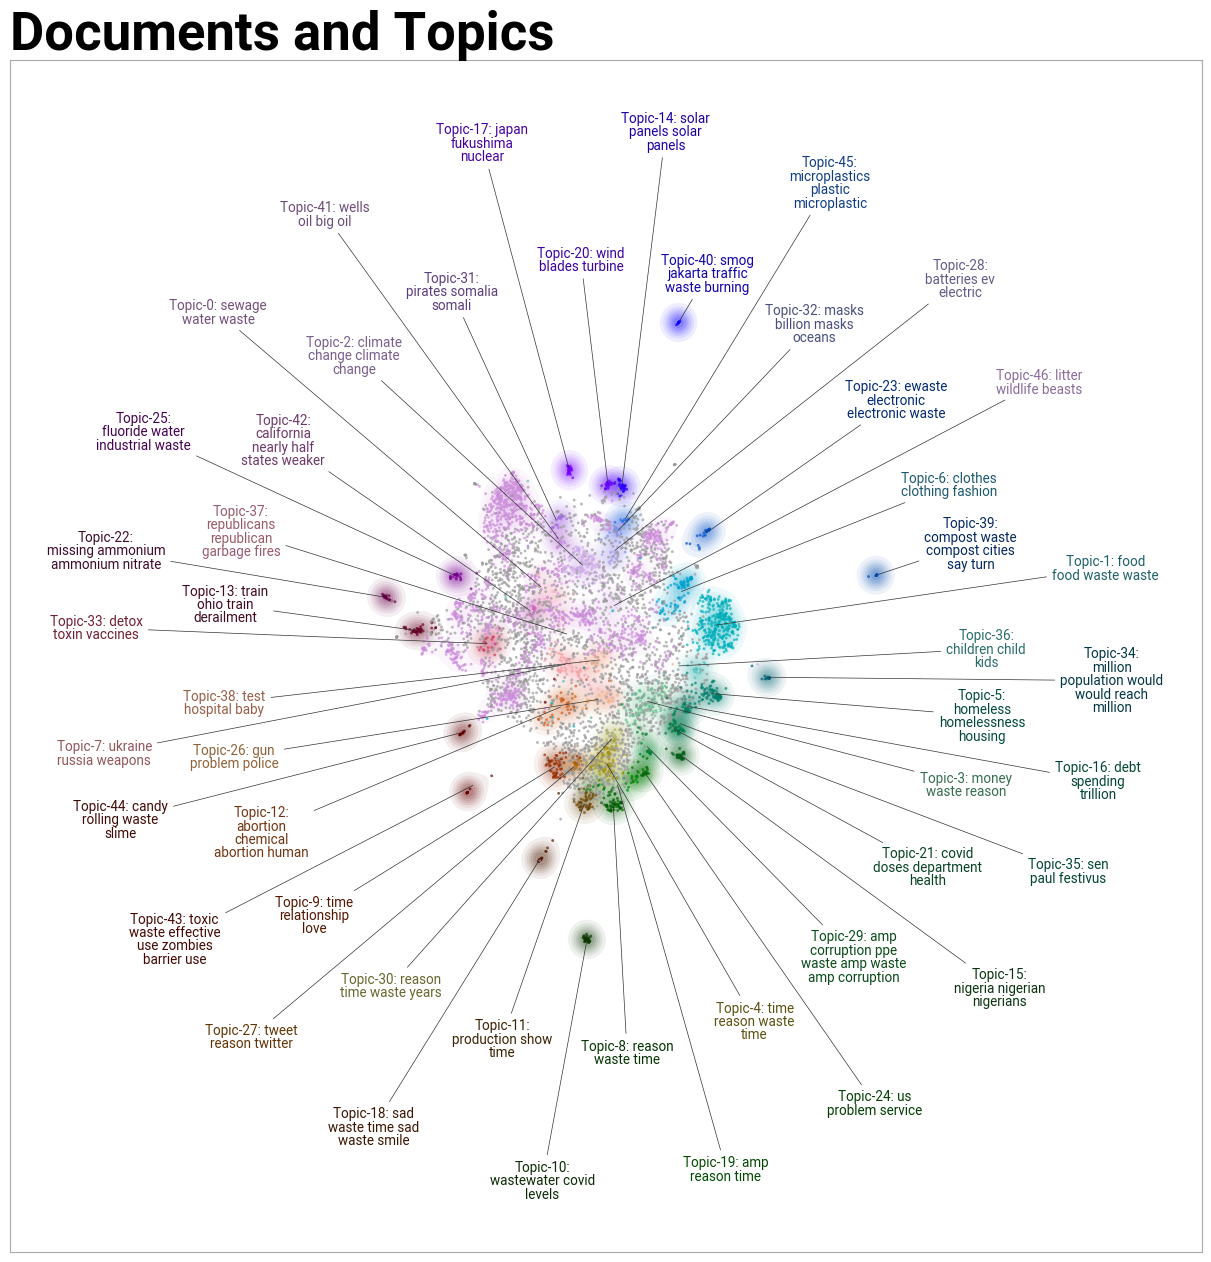

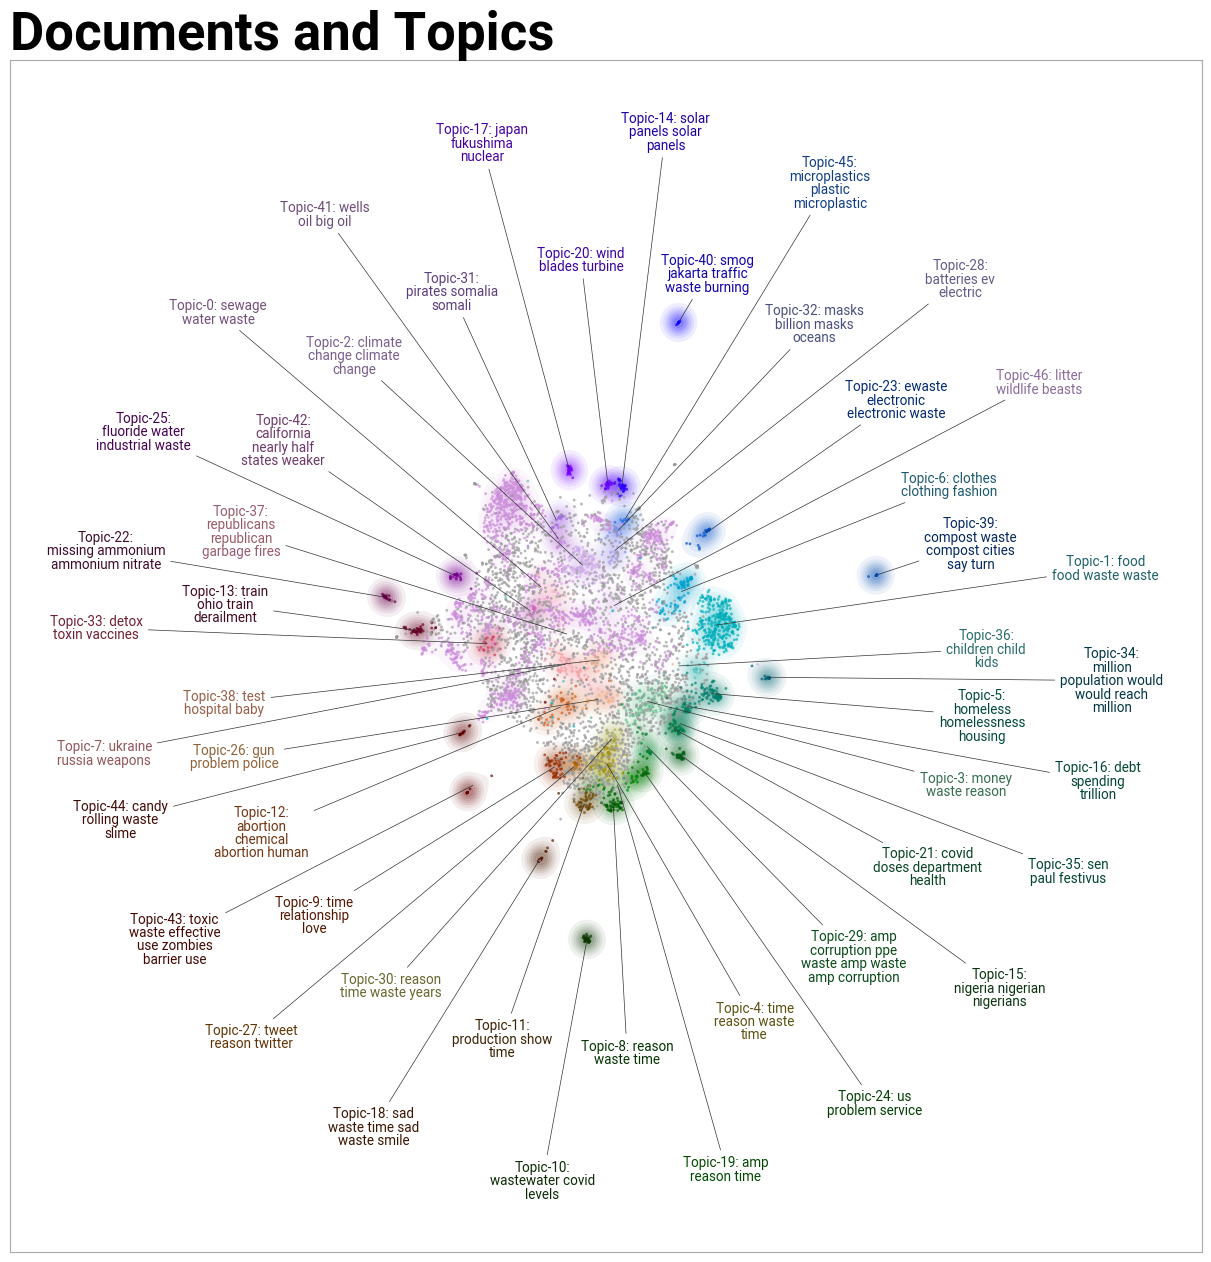

In [16]:
results_per_sentiment['Negative']['model'].visualize_document_datamap(results_per_sentiment['Negative']['text_data'])

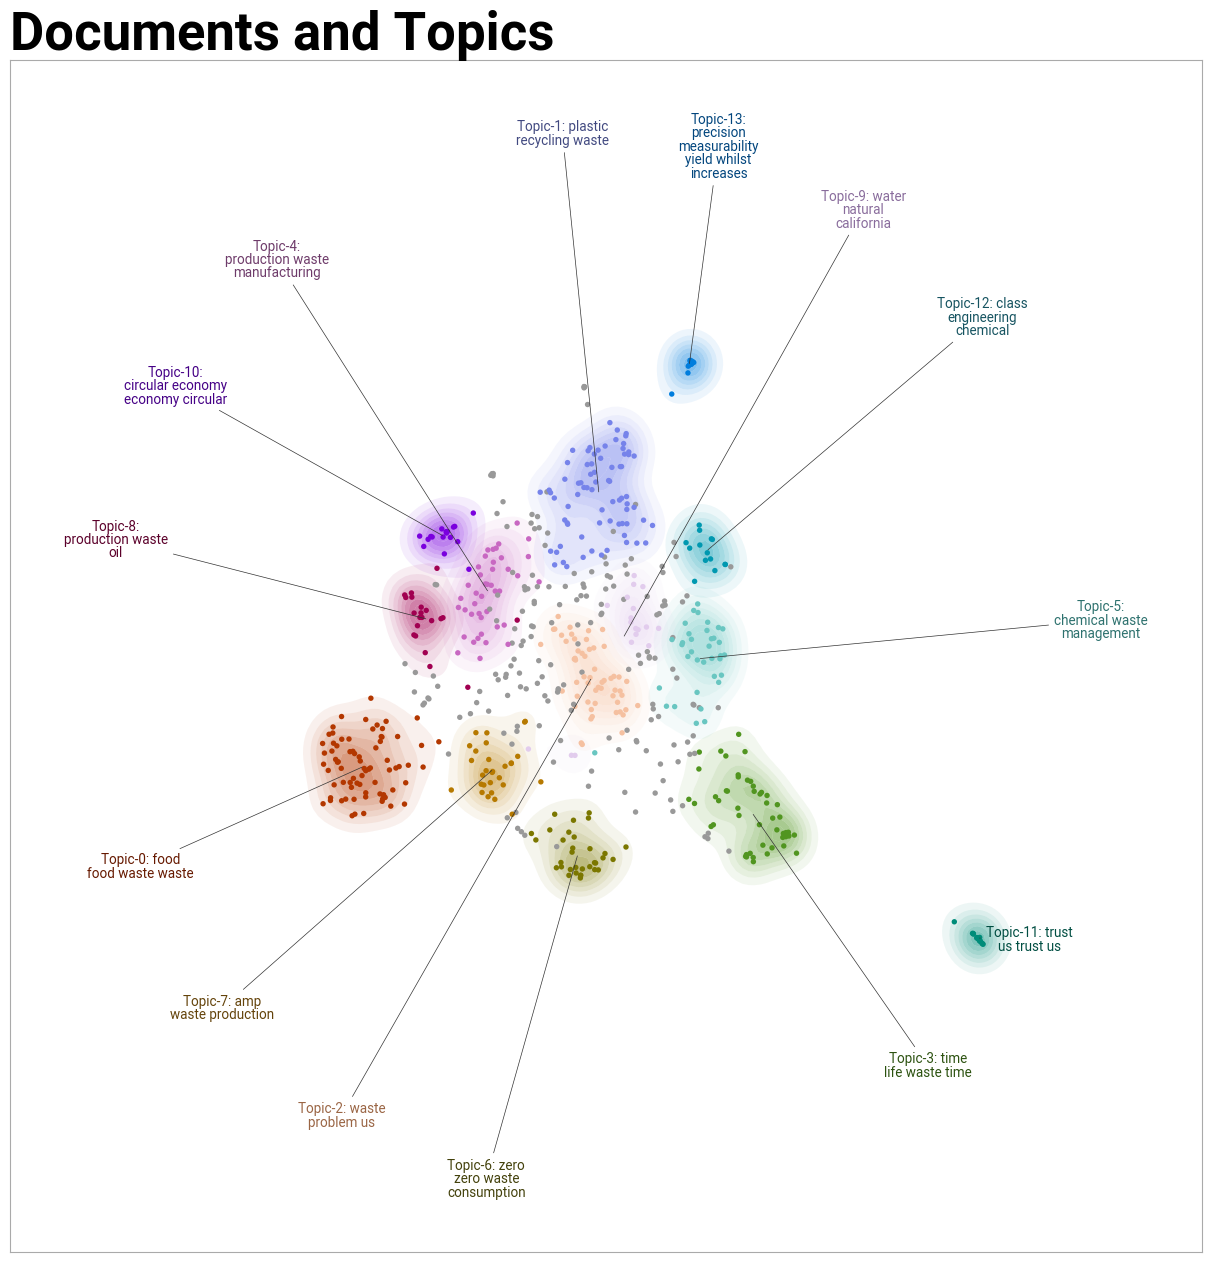

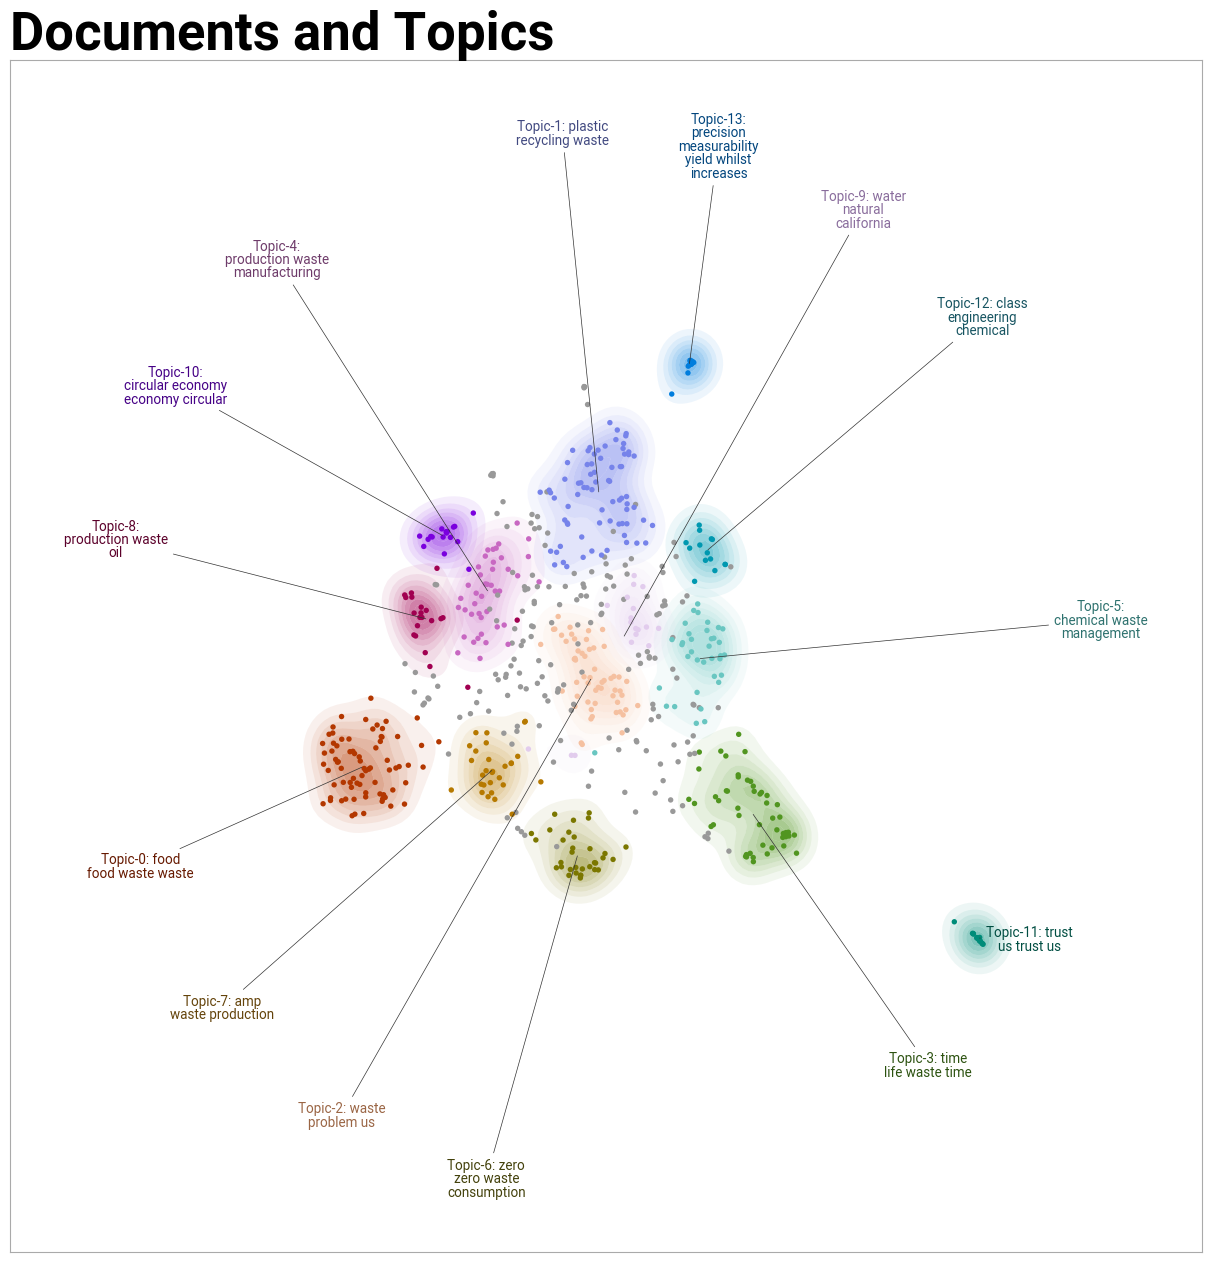

In [18]:
results_per_sentiment['Positive']['model'].visualize_document_datamap(results_per_sentiment['Positive']['text_data'])

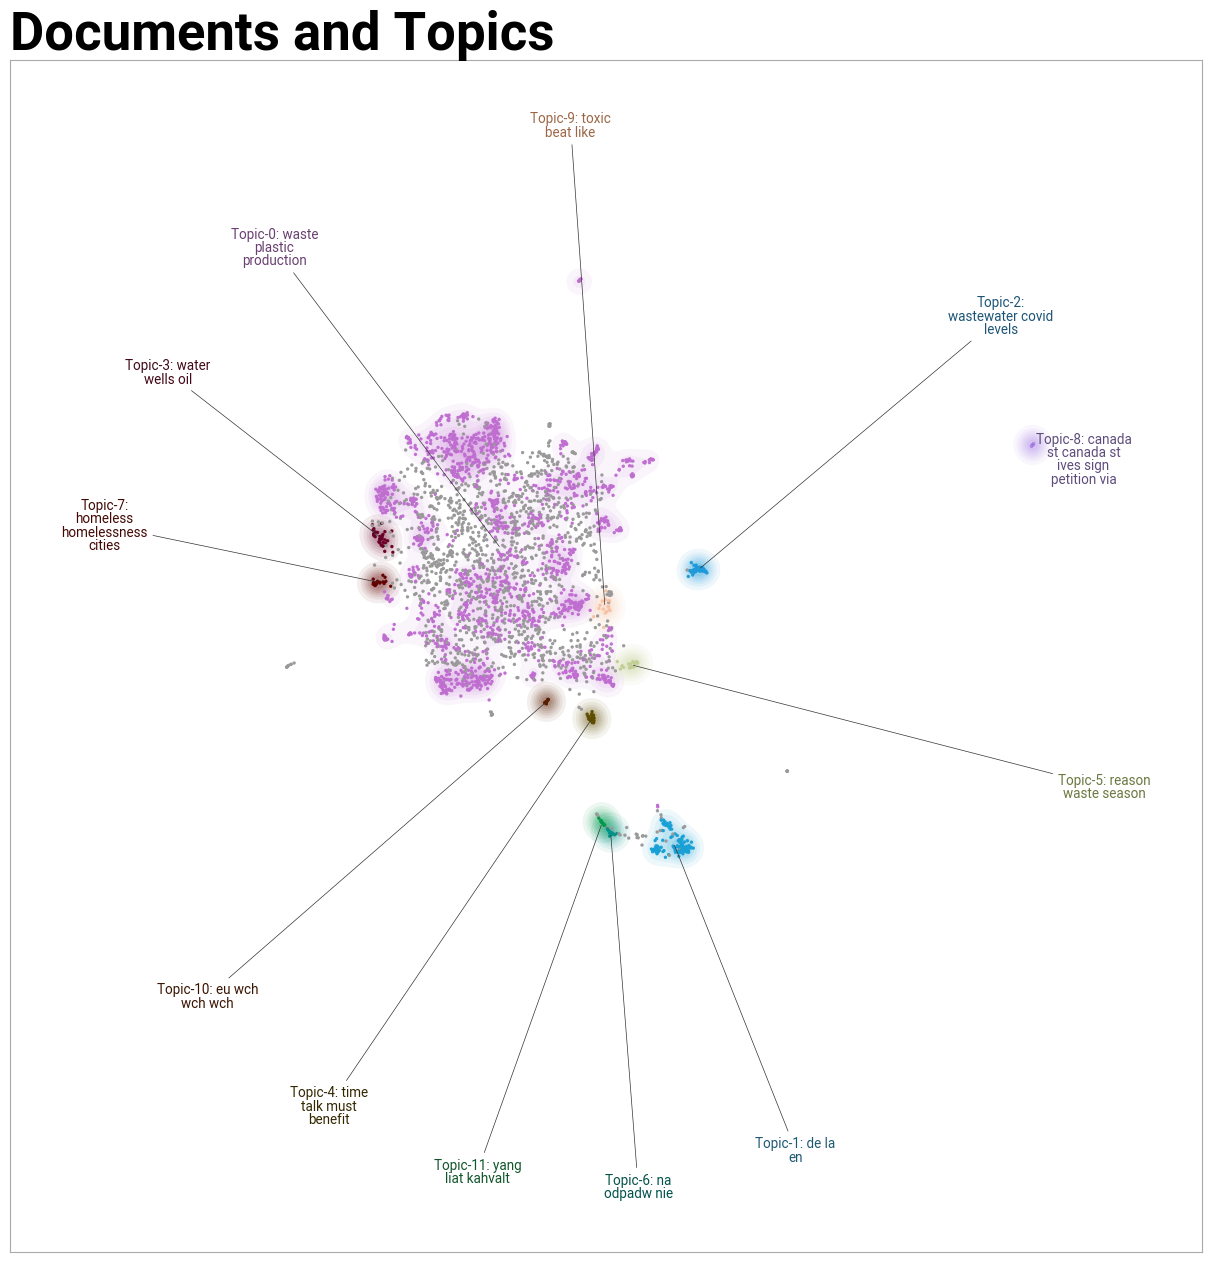

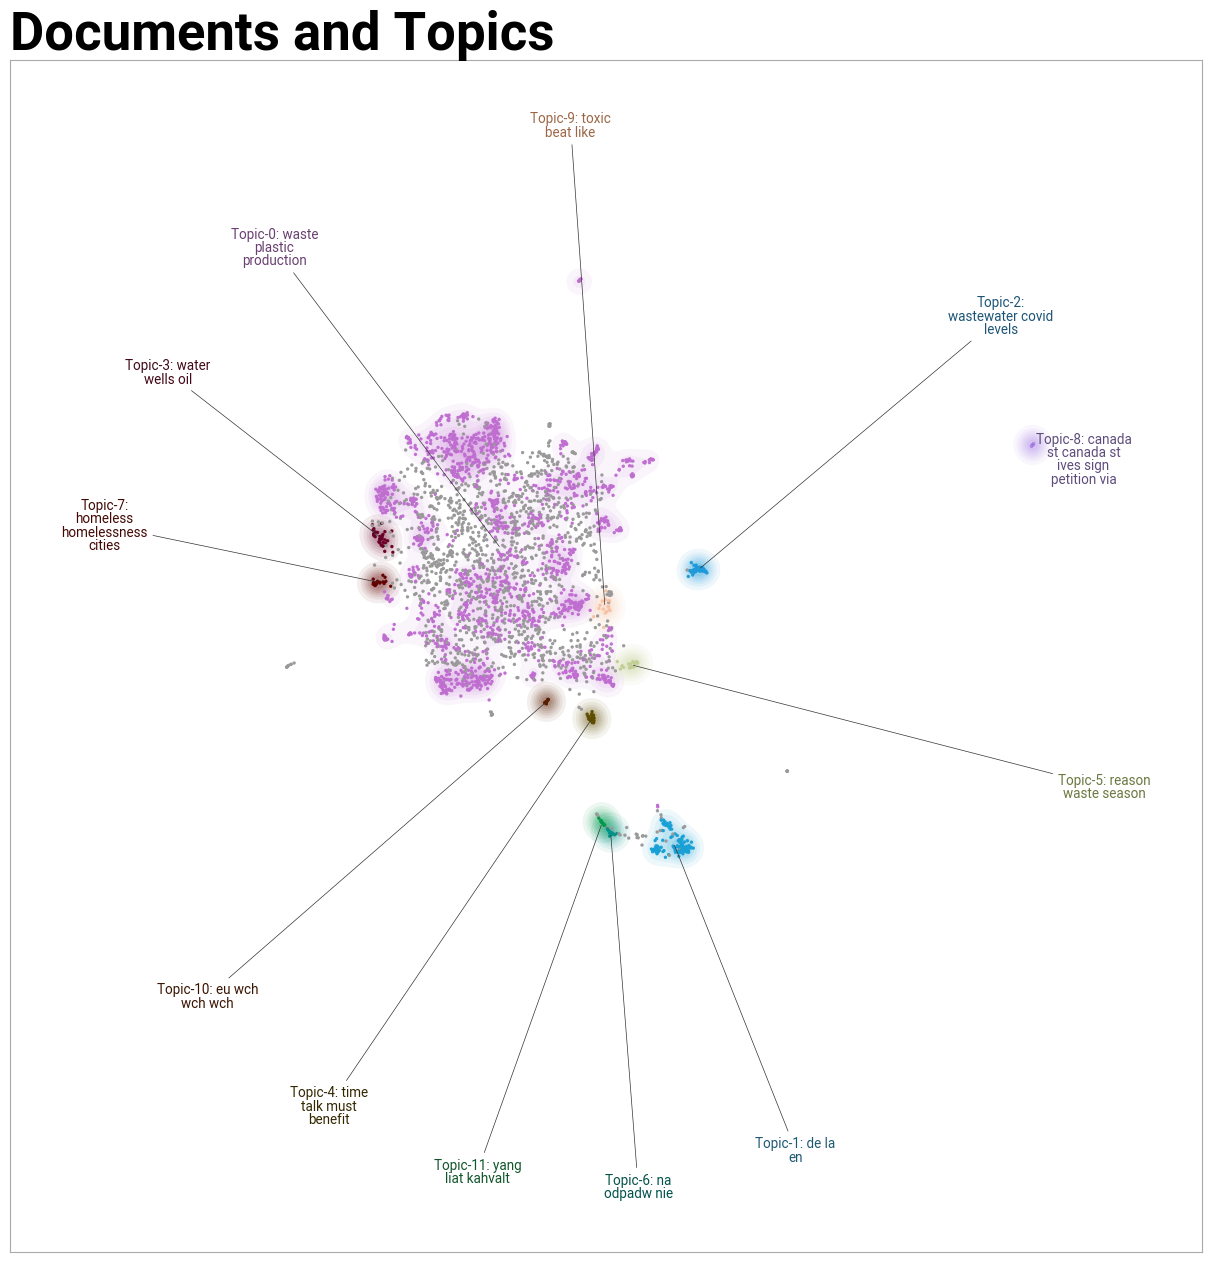

In [17]:
results_per_sentiment['Neutral']['model'].visualize_document_datamap(results_per_sentiment['Neutral']['text_data'])